In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [11]:
plt.show(X_train[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
X_test = X_test/255.0

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [25]:
weights, biases = model.layers[1].get_weights()

In [27]:
weights.shape

(784, 300)

In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 1.9444 - accuracy: 0.5005 - val_loss: 1.4769 - val_accuracy: 0.6722
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 1.2232 - accuracy: 0.6652 - val_loss: 1.0282 - val_accuracy: 0.7070
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9336 - accuracy: 0.7074 - val_loss: 0.8396 - val_accuracy: 0.7344
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7925 - accuracy: 0.7313 - val_loss: 0.7357 - val_accuracy: 0.7434
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7145 - accuracy: 0.7441 - val_loss: 0.6785 - val_accuracy: 0.7548
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6677 - accuracy: 0.7562 - val_loss: 0.6376 - val_accuracy: 0.7672
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6352 - accuracy: 0.7672 - val_loss: 0.6096 - val_accuracy:

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
history.epoch


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [33]:
history.history

{'loss': [0.7162771224975586,
  0.4874137043952942,
  0.44217294454574585,
  0.41471201181411743,
  0.39367610216140747,
  0.3793827295303345,
  0.3654904067516327,
  0.35362985730171204,
  0.3443739116191864,
  0.33461248874664307,
  0.3260561227798462,
  0.3181034326553345,
  0.31040826439857483,
  0.30452534556388855,
  0.29802271723747253,
  0.2907744348049164,
  0.2858039140701294,
  0.2798832356929779,
  0.2754451632499695,
  0.2700284719467163,
  0.2651733160018921,
  0.2613174021244049,
  0.2556806206703186,
  0.2518077492713928,
  0.24778927862644196,
  0.24344781041145325,
  0.24019579589366913,
  0.23587286472320557,
  0.23182591795921326,
  0.22789902985095978],
 'accuracy': [0.762254536151886,
  0.8299999833106995,
  0.8451636433601379,
  0.8551454544067383,
  0.8621090650558472,
  0.8671272993087769,
  0.8708727359771729,
  0.8755090832710266,
  0.8769272565841675,
  0.8807454705238342,
  0.8839818239212036,
  0.8860909342765808,
  0.888381838798523,
  0.8906000256538391,

In [34]:
import pandas as pd

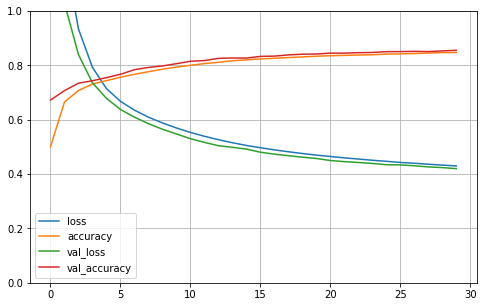

In [41]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3361 - accuracy: 0.8805


[0.3361138701438904, 0.8805000185966492]

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4625 - accuracy: 0.8343


[0.46245893836021423, 0.8342999815940857]

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.32, 0.01, 0.55],
       [0.  , 0.  , 0.88, 0.  , 0.01, 0.  , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [5]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing = fetch_california_housing()

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [9]:
scaler= StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_valid = scaler.fit_transform(X_valid)

In [12]:
X_test = scaler.fit_transform(X_test)

In [13]:
X_train.shape

(11610, 8)

In [14]:
X_train.shape[1:]

(8,)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7662 - val_loss: 6.4632
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 55.3994 - val_loss: 8.6243
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7610 - val_loss: 0.5815
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.5075
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4465 - val_loss: 0.4635
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4243 - val_loss: 0.4571
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4098 - val_loss: 0.4377
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_loss: 0.4230
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3973 - val_loss: 0.4262
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3889 - val_loss: 0.414

In [64]:
y_pred

array([[1.1002488],
       [3.1450078],
       [2.5994577]], dtype=float32)

In [66]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [67]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [68]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3521 - val_loss: 0.3904
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3508 - val_loss: 0.3897
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3497 - val_loss: 0.3729
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3463 - val_loss: 0.3883
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3446 - val_loss: 0.3866
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3434 - val_loss: 0.3755
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3419 - val_loss: 0.3853
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3404 - val_loss: 0.3730
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3389 - val_loss: 0.3879
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3377 - val_loss: 0.3875

In [69]:
1pwd

SyntaxError: invalid syntax (<ipython-input-69-f34ba51358de>, line 1)

In [70]:
!pwd

/Users/krishansingh/hands-on-ML


In [71]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 300)               235200    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [28]:
X_train_full[:5].shape

(5, 28, 28)

In [27]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history=model.fit(X_train_full, y_train_full, epochs=20,validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
1869/1875 [============================>.] - ETA: 0s - loss: 27.6123

ValueError: in user code:

    File "/Users/krishansingh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "/Users/krishansingh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/krishansingh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "/Users/krishansingh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "/Users/krishansingh/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/krishansingh/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 8)


In [32]:
tf.random.set_seed(42)
np.random.seed(42)

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

In [40]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [42]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170508288/170498071 [==============================] - 12s 0us/step


In [43]:
X_train.shape

(45000, 32, 32, 3)

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


In [48]:
model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 51s 28ms/step - loss: 3.9965 - accuracy: 0.1645 - val_loss: 2.1493 - val_accuracy: 0.2260
Epoch 2/100
1407/1407 [==============================] - 30s 21ms/step - loss: 2.0483 - accuracy: 0.2560 - val_loss: 2.0979 - val_accuracy: 0.2386
Epoch 3/100
1407/1407 [==============================] - 36s 25ms/step - loss: 1.9245 - accuracy: 0.2966 - val_loss: 1.9067 - val_accuracy: 0.3148
Epoch 4/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.8482 - accuracy: 0.3278 - val_loss: 1.8766 - val_accuracy: 0.3244
Epoch 5/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.7884 - accuracy: 0.3513 - val_loss: 1.7597 - val_accuracy: 0.3574
Epoch 6/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.7346 - accuracy: 0.3724 - val_loss: 1.7947 - val_accuracy: 0.3508
Epoch 7/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.6892 - accuracy: 0.3884 - val_loss: 1

KeyboardInterrupt: 

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
    
model.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [53]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=40,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/40
1407/1407 [==============================] - 67s 39ms/step - loss: 1.8453 - accuracy: 0.3392 - val_loss: 1.7084 - val_accuracy: 0.3892
Epoch 2/40
1407/1407 [==============================] - 64s 45ms/step - loss: 1.6722 - accuracy: 0.4050 - val_loss: 1.5970 - val_accuracy: 0.4300
Epoch 3/40
1407/1407 [==============================] - 64s 45ms/step - loss: 1.5981 - accuracy: 0.4345 - val_loss: 1.5310 - val_accuracy: 0.4436
Epoch 4/40
1407/1407 [==============================] - 59s 42ms/step - loss: 1.5480 - accuracy: 0.4510 - val_loss: 1.5161 - val_accuracy: 0.4608
Epoch 5/40
1407/1407 [==============================] - 54s 38ms/step - loss: 1.5045 - accuracy: 0.4652 - val_loss: 1.4428 - val_accuracy: 0.4822
Epoch 6/40
1407/1407 [==============================] - 50s 35ms/step - loss: 1.4690 - accuracy: 0.4777 - val_loss: 1.4309 - val_accuracy: 0.4850
Epoch 7/40
1407/1407 [==============================] - 59s 42ms/step - loss: 1.4351 - accuracy: 0.4892 - val_loss: 1.4514 -

KeyboardInterrupt: 